In [1]:
import os
import cv2      
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [6]:
os.getcwd()

'/home/balint/projects/SMLM-SR/notebooks'

In [7]:
folder_path = "../dataset/smlm/smlm_dataset/gt/"
folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

In [ ]:
sizes = []
i = 0
for folder in folders:
    sr, wf = [], []
    path = os.path.join(folder_path, folder, "processed")
    if os.path.exists(path):
        for file in os.listdir(path): 
            if file.startswith("widefield_ds_") and 'test' not in file:
                wf.append(file)
            elif file.startswith("sr_") and 'test' not in file:
                sr.append(file)
        for wf_name, sr_name in zip(sorted(wf), sorted(sr)):
            im_wf = cv2.imread(os.path.join(path, wf_name))
            im_wf = cv2.cvtColor(im_wf, cv2.COLOR_BGR2GRAY)
            im_wf = im_wf / np.max(im_wf) * 255
            im_sr = cv2.imread(os.path.join(path, sr_name))
            im_sr = cv2.cvtColor(im_sr, cv2.COLOR_BGR2GRAY)
            im_sr = im_sr / np.max(im_sr) * 255
            im_sr = cv2.resize(im_sr, (im_wf.shape[1] * 4, im_wf.shape[0] * 4))
            sizes.append([im_wf.shape, im_sr.shape, np.divide(im_sr.shape, im_wf.shape)])
            print([im_wf.shape, im_sr.shape, np.divide(im_sr.shape, im_wf.shape)])
            # cv2.imwrite(os.path.join(folder_path, f"collection/lr/{i:04d}.png"), im_wf)
            # cv2.imwrite(os.path.join(folder_path, f"collection/gt/{i:04d}.png"), im_sr)
            i+=1
            break
    break


[(258, 256), (1032, 1024), array([4., 4.])]
[(262, 260), (1048, 1040), array([4., 4.])]
[(260, 270), (1040, 1080), array([4., 4.])]
[(259, 268), (1036, 1072), array([4., 4.])]
[(259, 268), (1036, 1072), array([4., 4.])]
[(258, 261), (1032, 1044), array([4., 4.])]
[(258, 261), (1032, 1044), array([4., 4.])]
[(258, 260), (1032, 1040), array([4., 4.])]
[(258, 265), (1032, 1060), array([4., 4.])]
[(270, 276), (1080, 1104), array([4., 4.])]
[(260, 260), (1040, 1040), array([4., 4.])]
[(260, 262), (1040, 1048), array([4., 4.])]
[(476, 465), (1904, 1860), array([4., 4.])]
[(359, 491), (1436, 1964), array([4., 4.])]
[(266, 257), (1064, 1028), array([4., 4.])]
[(263, 260), (1052, 1040), array([4., 4.])]
[(263, 262), (1052, 1048), array([4., 4.])]
[(260, 263), (1040, 1052), array([4., 4.])]
[(258, 260), (1032, 1040), array([4., 4.])]
[(299, 302), (1196, 1208), array([4., 4.])]
[(302, 303), (1208, 1212), array([4., 4.])]
[(301, 303), (1204, 1212), array([4., 4.])]
[(303, 304), (1212, 1216), array

In [11]:
im_wf = cv2.imread(os.path.join(folder_path, "0000.png",), cv2.IMREAD_UNCHANGED)
# im_wf = cv2.cvtColor(im_wf, cv2.COLOR_BGR2GRAY)
# im_wf = im_wf / np.max(im_wf) * 255
# im_sr = cv2.imread(os.path.join(path, sr_name))
# im_sr = cv2.cvtColor(im_sr, cv2.COLOR_BGR2GRAY)
# im_sr = im_sr / np.max(im_sr) * 255

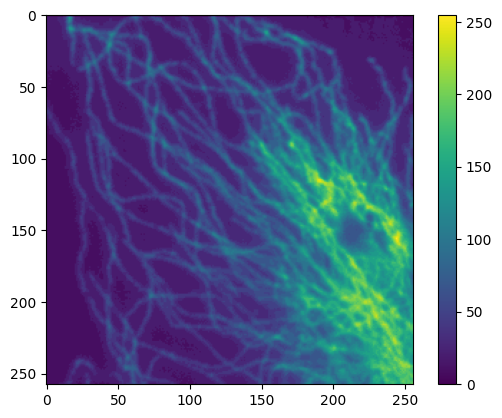

In [21]:
plt.imshow(im_wf)
plt.colorbar()

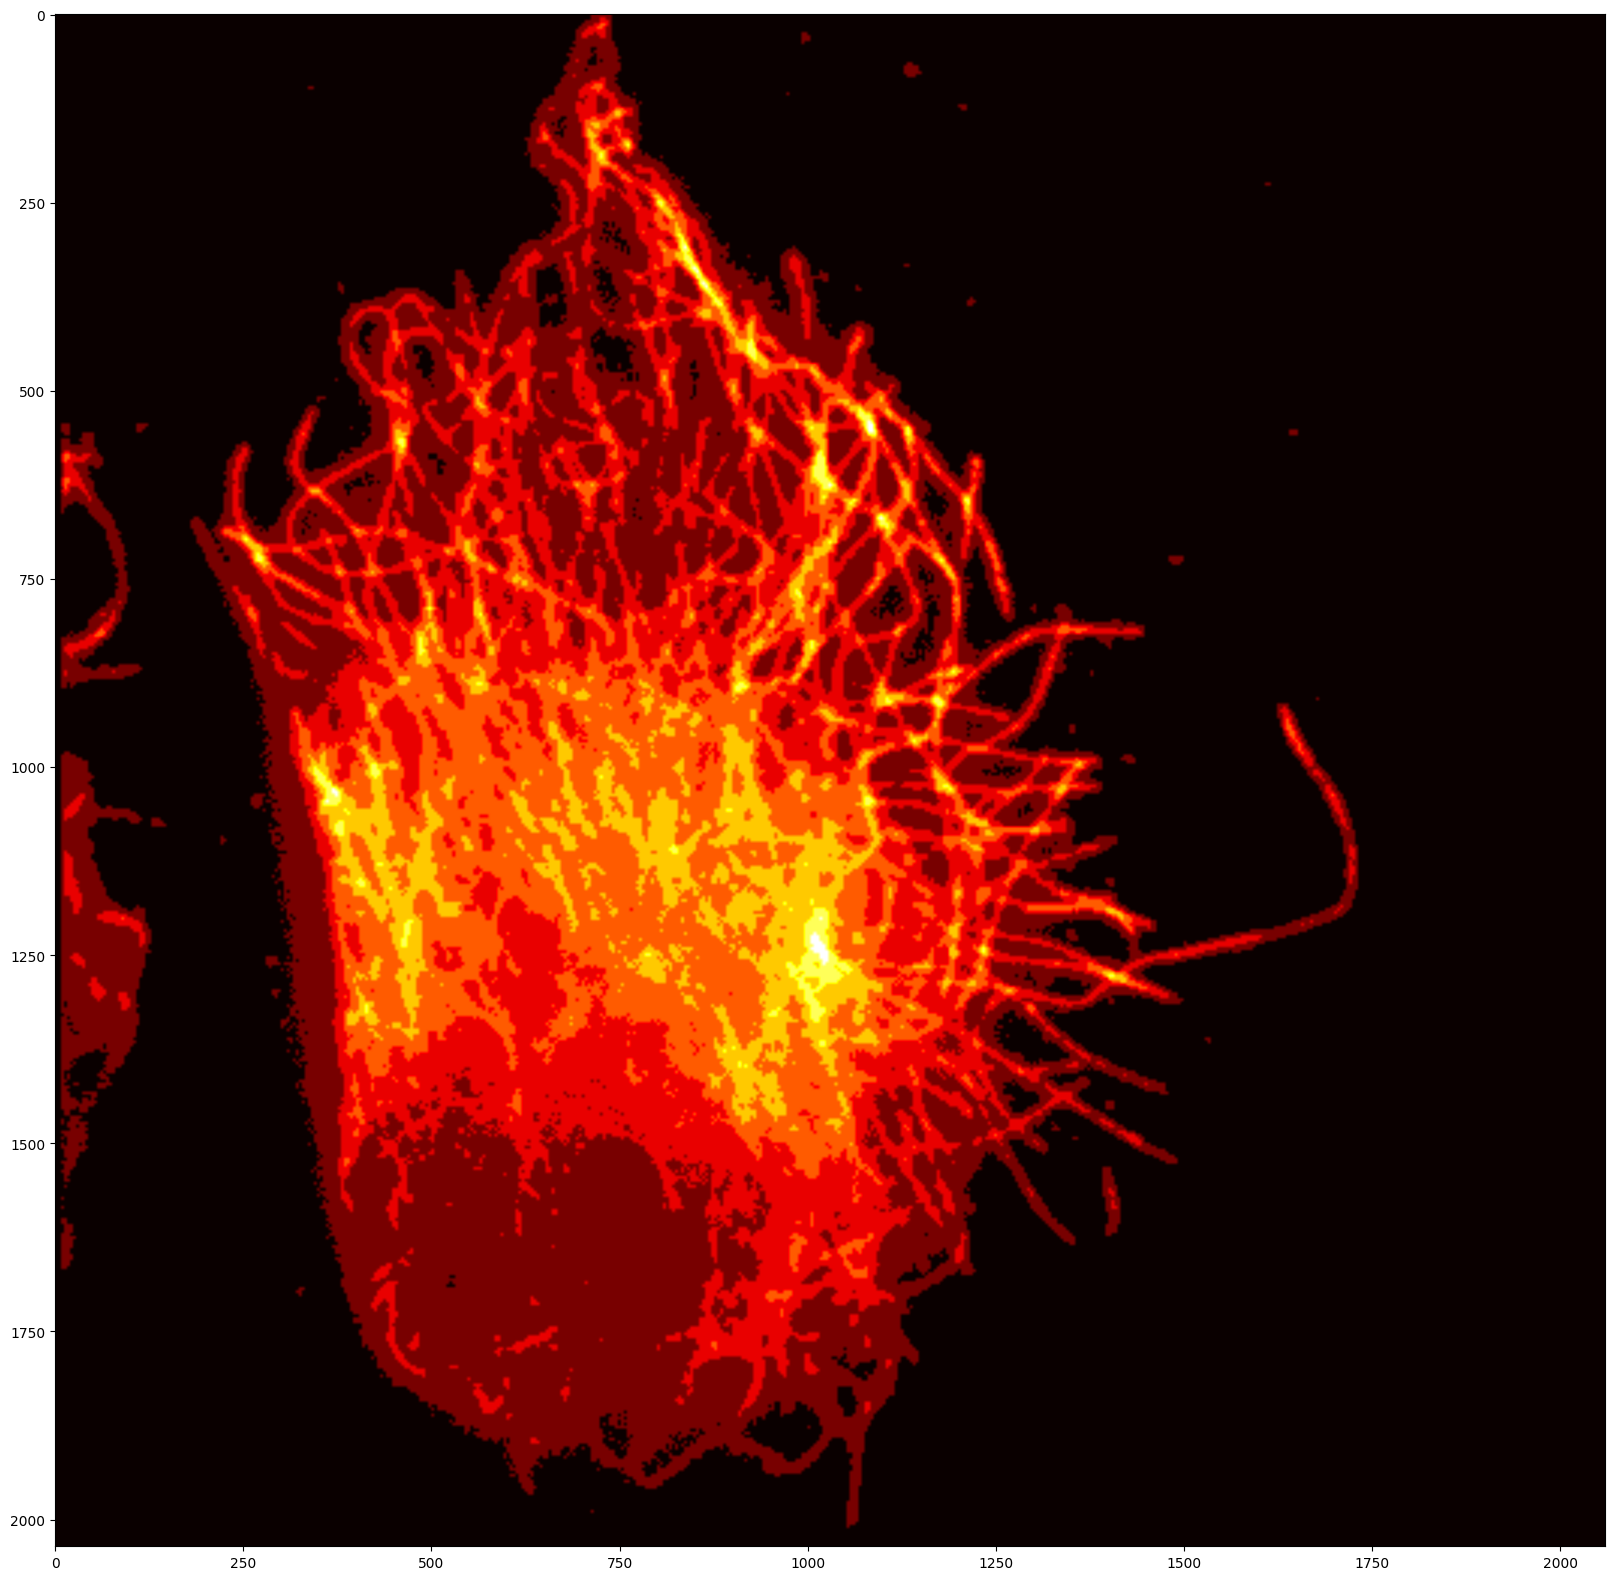

In [42]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.resize(im_wf, (im_sr.shape[1], im_sr.shape[0])), cmap=cm.hot)
# plt.imshow(im_sr, alpha=0.5, cmap=cm.hot)

In [11]:
sizes = np.array(sizes)

In [12]:
np.mean(sizes, axis=0)

array([[ 319.35294118,  323.05882353],
       [1661.4       , 1671.55294118],
       [   5.21000793,    5.19335334]])

In [13]:
sizes

array([[[2.58000000e+02, 2.56000000e+02],
        [1.35300000e+03, 1.35000000e+03],
        [5.24418605e+00, 5.27343750e+00]],

       [[2.62000000e+02, 2.60000000e+02],
        [1.37900000e+03, 1.37200000e+03],
        [5.26335878e+00, 5.27692308e+00]],

       [[2.60000000e+02, 2.70000000e+02],
        [1.36900000e+03, 1.42200000e+03],
        [5.26538462e+00, 5.26666667e+00]],

       [[2.59000000e+02, 2.68000000e+02],
        [1.35600000e+03, 1.39900000e+03],
        [5.23552124e+00, 5.22014925e+00]],

       [[2.59000000e+02, 2.68000000e+02],
        [1.36200000e+03, 1.40500000e+03],
        [5.25868726e+00, 5.24253731e+00]],

       [[2.58000000e+02, 2.61000000e+02],
        [1.35500000e+03, 1.37500000e+03],
        [5.25193798e+00, 5.26819923e+00]],

       [[2.58000000e+02, 2.61000000e+02],
        [1.35800000e+03, 1.37200000e+03],
        [5.26356589e+00, 5.25670498e+00]],

       [[2.58000000e+02, 2.60000000e+02],
        [1.35200000e+03, 1.36800000e+03],
        [5.24031008e

In [12]:
im_wf.shape

(1032, 1024)